## Observations and Insights 

In [44]:
#3 Observations:
#     1.) Even though the assignment wanted us to analyze the top 4 drugs, from the Quartiles, Outliers and Boxplots section 
#         I would have just reviewed Ramican and Capomulin since they make up the majority of the top spots for smaller tumors
#     2.) The male to female populations appear to be almost identical and the reults from the two top drugs appear to be equally 
#         spread between males vs. females telling me that the sucess rate is consistent gender to gender
#     3.) Th correlation of mice weight to tumor size appears to be very high and the linear regression shows a very good fit

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as sts
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mouse_data.head()
# combined_mouse_data.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the DataFrame.
combined_mouse_data["Mouse ID"].nunique()

# Other Attempts:
    # combined_mouse_data.value_count("Mouse ID")
    # combined_mouse_data.domain.nunique()
    # sum_it_up = mice_group.sum()
    # sum_it_up.head()
    # mice_group.count()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Attempt 1:
    # duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID","Timepoint"])]
    # duplicate_mice.head()

# Attempt 2:
    # duplicate_mice = combined_mouse_data["Mouse ID"]
    # duplicate_mice.duplicated().sum()
    # duplicate_mice.loc[duplicate_mice(keep="first"), :]

duplicate_id = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_id.unique()

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Attempt 1:
    # clean_df = combined_mouse_data.drop_duplicates(subset ="Mouse ID", keep = False, inplace = True) 
    # clean_df.head()

clean_df = combined_mouse_data[combined_mouse_data["Mouse ID"].isin(duplicate_id) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.

# Attempt 1:
    # mice_group = combined_mouse_data.groupby(["Mouse ID"])
    # sum_it_up = mice_group.sum()
    # sum_it_up.head()
    # mice_group.count()
    
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
table_summary = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
table_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

tumor_volume_group = clean_df.groupby("Drug Regimen")

mean = tumor_volume_group["Tumor Volume (mm3)"].mean()
median = tumor_volume_group["Tumor Volume (mm3)"].median()
var = tumor_volume_group["Tumor Volume (mm3)"].var()
sd = tumor_volume_group["Tumor Volume (mm3)"].std()
sem = tumor_volume_group["Tumor Volume (mm3)"].sem()
                                          
# mean_numpy = np.mean(tumor_volume)
# # print(f"The mean tumor volume is {mean_numpy}")

# median_numpy = np.median(tumor_volume)
# # print(f"The median tumor volume is {median_numpy}")

# mode = sts.mode(tumor_volume)
# # print(f"The mode tumor volume is {mode_scipy}")

# var_numpy = np.var(tumor_volume,ddof = 0)
# # print(f"The population variance using the NumPy module is {var_numpy}")

# sd_numpy = np.std(tumor_volume,ddof = 0)
# # print(f"The population standard deviation using the NumPy module is {sd_numpy}")

# # sample = fuel_economy.sample(30)
# # print(f"The SEM value is {sem(sample.Combined_MPG)}")

summary_table = pd.DataFrame({"Mean": mean, "Median": median,"Variance": var, "Standard Deviation": sd, "SEM": sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

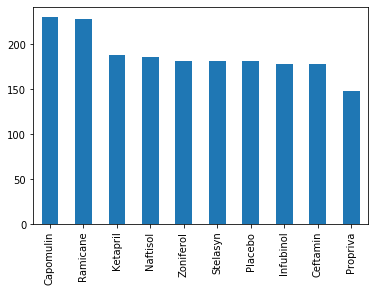

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_counts = clean_df["Drug Regimen"].value_counts()

drug_counts.plot(kind="bar")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

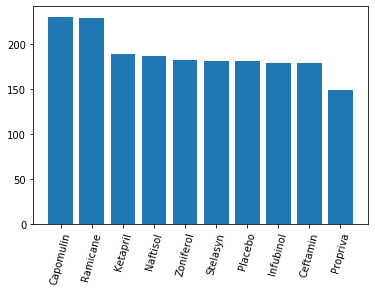

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(drug_counts.index.values, drug_counts.values)
plt.xticks(rotation = 75)

## Pie Plots

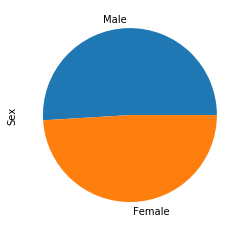

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = clean_df["Sex"].value_counts()

gender_counts.plot(kind="pie")
plt.show()

([<matplotlib.patches.Wedge at 0x16288332a88>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

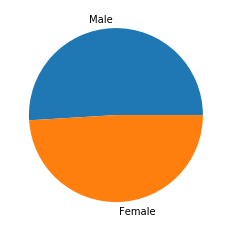

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts.values, labels = gender_counts.index.values)

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor = clean_df.groupby(["Mouse ID"]).max()
final_tumor = final_tumor.reset_index()
merge_df = final_tumor[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merge_df = merge_df.sort_values(by = ["Tumor Volume (mm3)"])
merge_df.head(50)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
96,k403,45,Ramicane,Male,21,16,22.050126,1
174,s185,45,Capomulin,Female,3,17,23.343598,1
121,m601,45,Capomulin,Male,22,17,28.430964,1
226,x401,45,Capomulin,Female,16,15,28.484033,0
70,g791,45,Ramicane,Male,11,16,29.128472,1
177,s508,45,Ramicane,Male,1,17,30.276232,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
119,m546,45,Ramicane,Male,18,16,30.564625,1
244,z578,45,Ramicane,Male,11,16,30.638696,0
192,u364,45,Capomulin,Male,18,17,31.023923,3


In [17]:
ramicane = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
infubinol = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
propriva = merge_df.loc[merge_df["Drug Regimen"] == "Propriva"]["Tumor Volume (mm3)"]


In [18]:
quartiles_r = ramicane.quantile([.25,.5,.75])
quartiles_c = capomulin.quantile([.25,.5,.75])
quartiles_i = infubinol.quantile([.25,.5,.75])
quartiles_p = propriva.quantile([.25,.5,.75])

lowerq_r = quartiles_r[0.25]
upperq_r = quartiles_r[0.75]
iqr_r = upperq_r-lowerq_r
lower_bound_r = lowerq_r - (1.5*iqr_r)
upper_bound_r = upperq_r + (1.5*iqr_r)

lowerq_c = quartiles_c[0.25]
upperq_c = quartiles_c[0.75]
iqr_c = upperq_c-lowerq_c
lower_bound_c = lowerq_c - (1.5*iqr_c)
upper_bound_c = upperq_c + (1.5*iqr_c)

lowerq_i = quartiles_i[0.25]
upperq_i = quartiles_i[0.75]
iqr_i = upperq_i-lowerq_i
lower_bound_i = lowerq_i - (1.5*iqr_i)
upper_bound_i = upperq_i + (1.5*iqr_i)

lowerq_p = quartiles_p[0.25]
upperq_p = quartiles_p[0.75]
iqr_p = upperq_p-lowerq_p
lower_bound_p = lowerq_p - (1.5*iqr_p)
upper_bound_p = upperq_p + (1.5*iqr_p)

{'whiskers': [<matplotlib.lines.Line2D at 0x162883986c8>,
 'caps': [<matplotlib.lines.Line2D at 0x162883a0a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x16288398f48>,
 'medians': [<matplotlib.lines.Line2D at 0x162883a7fc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x162883a7cc8>,
 'means': []}

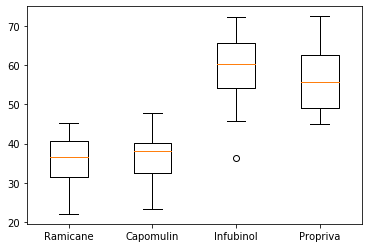

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([ramicane, capomulin, infubinol, propriva], labels = ["Ramicane","Capomulin" , "Infubinol", "Propriva"])

## Line and Scatter Plots

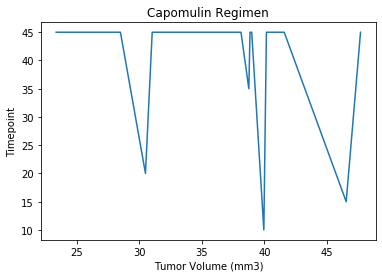

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

is_capomulin =  merge_df['Drug Regimen']=="Capomulin"
drug_capomulin = merge_df[is_capomulin]

plt.plot(drug_capomulin["Tumor Volume (mm3)"],drug_capomulin["Timepoint"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Capomulin Regimen")
plt.show()

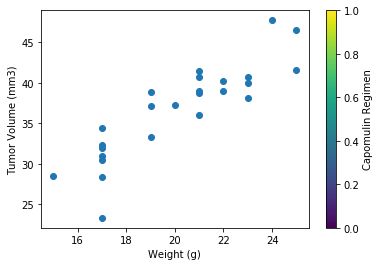

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# drug_capomulin = merge_df[merge_df.Drug Regimen.eq(Capomulin)]

is_capomulin =  merge_df['Drug Regimen']=="Capomulin"
drug_capomulin = merge_df[is_capomulin]

plt.scatter(drug_capomulin["Weight (g)"],drug_capomulin["Tumor Volume (mm3)"])
clb = plt.colorbar()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
clb.set_label("Capomulin Regimen")
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(drug_capomulin["Weight (g)"],drug_capomulin["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


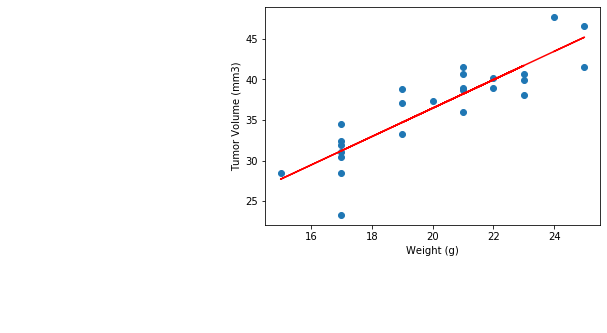

In [41]:
x_values = drug_capomulin["Weight (g)"]
y_values = drug_capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()